In [2]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

from random import  uniform
import pyDowker as pd
import networkx as nx

In [5]:
N = 10;

cycleGraph = nx.cycle_graph(N, create_using=nx.DiGraph);

edges = [e for e in cycleGraph.edges]; #our list of edges

#adding random weights from 0 to 10 to edges in our cycle graph
for e in edges:
    source = e[0];
    target = e[1];
    cycleGraph[source][target]['weight'] = 1 #uniform(0, 10);

distanceMatrix = np.zeros((N, N)); #initializing a matrix full of zeros

#ij-th entry in the distance matrix equals the length of shortest path from i to j
for i in np.arange(0, N, 1):
    for j in np.arange(0, N, 1):
        length = nx.shortest_path_length(cycleGraph, i, j, weight='weight');
        distanceMatrix[i, j] = length; 

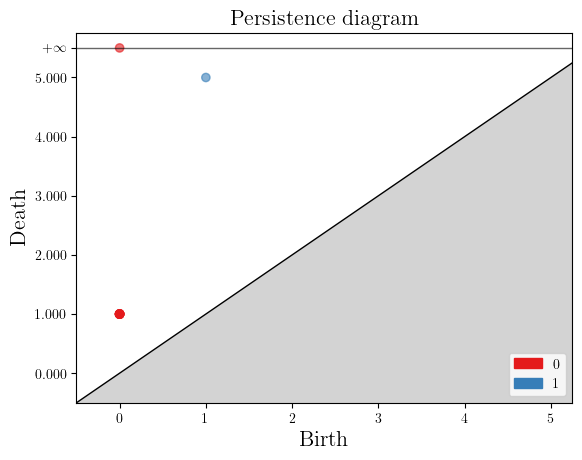

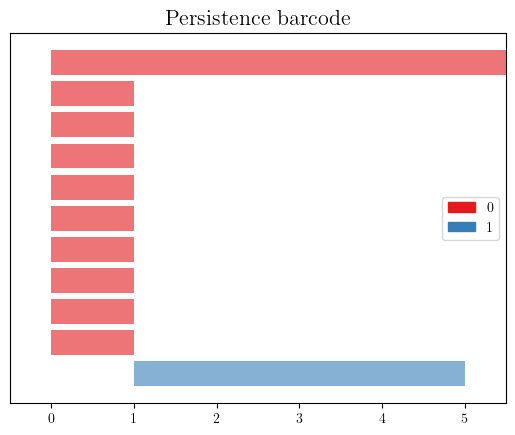

(1, (1.0, 5.0)) 5.0


In [6]:
MNeighbor = pd.DowkerComplex(distanceMatrix).create_simplex_tree(filtration='Sublevel', max_dimension=2)
dgms = MNeighbor.persistence()
f,ax = plt.subplots()
gd.plot_persistence_diagram(dgms, axes=ax)
plt.show()

gd.plot_persistence_barcode(dgms)
plt.show()
deathtime = dgms[0][1][1]
print(dgms[0], deathtime)

In [ ]:
# st = gd.SimplexTree() #create an empty simplex tree
# # print(np.arange(0,N,1))
# st.insert(np.arange(0,N,1))
# st.prune_above_dimension(3); 
# simplices = st.get_simplices();


In [14]:

# for simplex in simplices:
#     # print(simplex)
#     simplex = simplex[0];
#     # print(simplex)
#     functionsInSimplex = distanceMatrix[simplex, :];
#     # print(functionsInSimplex)
#     max_values = np.max(functionsInSimplex, 0);
#     min_value = np.min(max_values, 0);
#     st.assign_filtration(simplex, filtration = min_value);

# barcode = st.persistence(persistence_dim_max=True);

# gd.plot_persistence_diagram(barcode);

# print(st.persistence_intervals_in_dimension(1));
# #print('dim 0=', st.persistence_intervals_in_dimension(0), 'dim 1=', st.persistence_intervals_in_dimension(1), 'dim 2=', st.persistence_intervals_in_dimension(2))


In [15]:
comparisonMatrix = np.ones((N, N))*np.inf;

for i in range(N):
    for j in np.setdiff1d(range(N), [i]):
        comparisonMatrix[i, j] = max(distanceMatrix[i, j], distanceMatrix[j, i]);

minimum = np.min(np.min(comparisonMatrix, 0), 0);
print(minimum);
print(deathtime)

507.7931349587987
507.7931349587987
